In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("train_E6oV3lV.csv")
dataset.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [3]:
dataset.shape

(31962, 3)

In [4]:
data = dataset.iloc[:,1:3]
data.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

In [5]:
# clearing and modifying the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [6]:
corpus = []
for i in range(0, len(data)):
    
    review = data.values[i,1].lower()
    
    review = re.sub('@[a-zA-Z]*', ' ', review) # removing user handle
    
    review = re.sub('[^a-zA-Z#]', ' ', review) #removing any characters apart from alphabets
    
    review = review.split()  #splitting each words in list (tokenization)
    
    review = [ word for word in review if len(word) > 1]  # removing single digit words
    
    # removing stopwords
    review = [ word for word in review if not word in stopwords.words('english') ]
    
    # stemming
    review = [ ps.stem(word) for word in review ]  
    
    review = ' '.join(review)
    
    corpus.append(review)

In [7]:
corpus

['father dysfunct selfish drag kid dysfunct #run',
 'thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank',
 'bihday majesti',
 '#model love take time ur',
 'factsguid societi #motiv',
 'huge fan fare big talk leav chao pay disput get #allshowandnogo',
 'camp tomorrow danni',
 'next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl',
 'love land #allin #cav #champion #cleveland #clevelandcavali',
 'welcom #gr',
 '#ireland consum price index mom climb previou may #blog #silver #gold #forex',
 'selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love',
 'get see daddi today day #gettingf',
 '#cnn call #michigan middl school build wall chant #tcot',
 'comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin',
 'ouch junior angri #got #junior #yugyoem #omg',
 'thank paner #thank #posit',
 'retweet agre',
 '#friday smile around via ig user #cooki mak

In [8]:
data['tidy_tweet'] = corpus
data.head()

label                                              tweet  \
0      0   @user when a father is dysfunctional and is s...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                          tidy_tweet  
0     father dysfunct selfish drag kid dysfunct #run  
1  thank #lyft credit use caus offer wheelchair v...  
2                                     bihday majesti  
3                           #model love take time ur  
4                           factsguid societi #motiv

# Making Wordcloud

### Overall Tweets

In [9]:
all_words = ' '.join([ text for text in data['tidy_tweet'] ])
all_words

'father dysfunct selfish drag kid dysfunct #run thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank bihday majesti #model love take time ur factsguid societi #motiv huge fan fare big talk leav chao pay disput get #allshowandnogo camp tomorrow danni next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom #gr #ireland consum price index mom climb previou may #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love get see daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank paner #thank #posit retweet agre #friday smile around via ig user #cooki make peopl know essenti oil made chemic #euro peopl blame ha conced goal fat

In [10]:
all_words.count('father')

1428

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

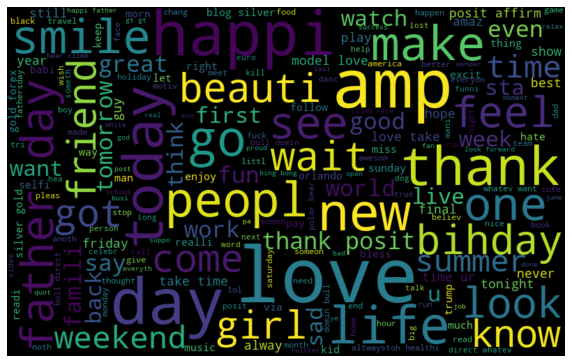

In [12]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Normal Tweets Sentiment

In [13]:
normal_words = ' '.join([ text for text in data['tidy_tweet'][data['label'] == 0] ])

In [14]:
normal_words

'father dysfunct selfish drag kid dysfunct #run thank #lyft credit use caus offer wheelchair van pdx #disapoint #getthank bihday majesti #model love take time ur factsguid societi #motiv huge fan fare big talk leav chao pay disput get #allshowandnogo camp tomorrow danni next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom #gr #ireland consum price index mom climb previou may #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love get see daddi today day #gettingf ouch junior angri #got #junior #yugyoem #omg thank paner #thank #posit #friday smile around via ig user #cooki make peopl know essenti oil made chemic #euro peopl blame ha conced goal fat rooney gave away free kick know bale hit sad littl dude #badday #coneofsham #cat #piss #funni #laugh product day happi man #wine tool #weekend time open amp

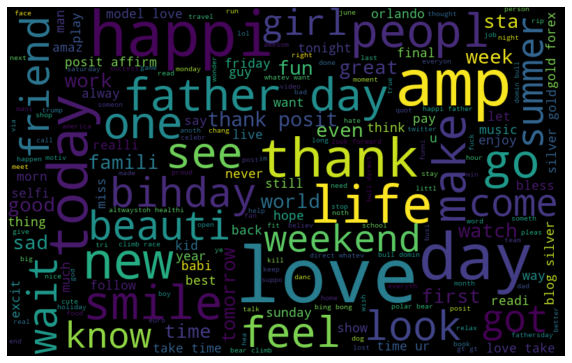

In [15]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Negative Tweets Sentiment

In [16]:
negative_words = ' '.join([ text for text in data['tidy_tweet'][data['label'] == 1] ])

In [17]:
negative_words

'#cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet agre lumpi say prove lumpi unbeliev st centuri need someth like #neverump #xenophobia let fight #love #peac white establish blk folx run around love promot great hey white peopl call peopl white #race #ident #med #altright use amp insecur lure men #whitesupremaci interest #linguist address #race amp racism #power #raciolinguist bring mock obama black #brexit #peopl protest #trump #republican trump fuher amp ye call #michelleobama gorilla racist long thought black peopl bet smaller hand show barri probabl lie #knick game suck #golf point one finger million point right back #jewishsupremacist might libtard #libtard #sjw #liber #polit take #trash america vote #hate vote vote vot hold open door woman woman nice thing even tri deni man ran governor ny state biggest african american popul #stereotyp #prejudic offer #hope solut creat old repe

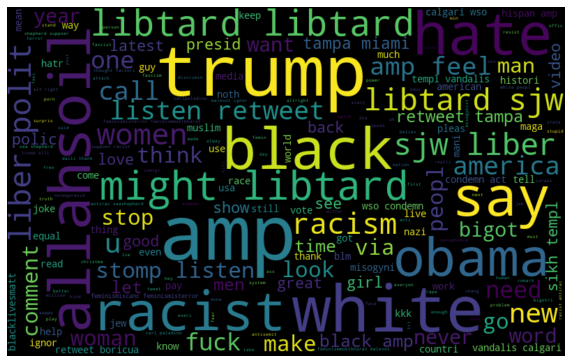

In [18]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Impact of hashtags in tweets sentiment

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall("#[a-zA-Z]*", i)
        hashtags.append(ht)

    return hashtags

In [20]:
# extracting hashtags from non racist/sexist tweets
HT_normal = hashtag_extract( data['tidy_tweet'][data['label'] == 0] )
HT_normal

[['#run'],
 ['#lyft', '#disapoint', '#getthank'],
 [],
 ['#model'],
 ['#motiv'],
 ['#allshowandnogo'],
 [],
 ['#school',
  '#exam',
  '#hate',
  '#imagin',
  '#actorslif',
  '#revolutionschool',
  '#girl'],
 ['#allin', '#cav', '#champion', '#cleveland', '#clevelandcavali'],
 ['#gr'],
 ['#ireland', '#blog', '#silver', '#gold', '#forex'],
 ['#orlando',
  '#standwithorlando',
  '#pulseshoot',
  '#orlandoshoot',
  '#biggerproblem',
  '#selfish',
  '#heabreak',
  '#valu',
  '#love'],
 ['#gettingf'],
 ['#got', '#junior', '#yugyoem', '#omg'],
 ['#thank', '#posit'],
 ['#friday', '#cooki'],
 [],
 ['#euro'],
 ['#badday', '#coneofsham', '#cat', '#piss', '#funni', '#laugh'],
 ['#wine', '#weekend'],
 ['#tgif', '#ff', '#gamedev', '#indiedev', '#indiegamedev', '#squad'],
 ['#upsideofflorida', '#shopalyssa', '#love'],
 ['#smile', '#media', '#pressconfer', '#antalya', '#turkey', '#throwback'],
 ['#ica'],
 [],
 ['#rip', '#orlando'],
 [],
 ['#alohafriday', '#time', '#not', '#exist', '#positivevib', '#haw

In [21]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract( data['tidy_tweet'][data['label'] == 1] )
HT_negative

[['#cnn', '#michigan', '#tcot'],
 ['#australia',
  '#opkillingbay',
  '#seashepherd',
  '#helpcovedolphin',
  '#thecov',
  '#helpcovedolphin'],
 [],
 [],
 ['#neverump', '#xenophobia'],
 ['#love', '#peac'],
 [],
 ['#race', '#ident', '#med'],
 ['#altright', '#whitesupremaci'],
 ['#linguist', '#race', '#power', '#raciolinguist'],
 ['#brexit'],
 ['#peopl', '#trump', '#republican'],
 ['#michelleobama'],
 ['#knick', '#golf'],
 ['#jewishsupremacist'],
 ['#libtard', '#sjw', '#liber', '#polit'],
 ['#trash', '#hate'],
 [],
 [],
 ['#stereotyp', '#prejudic', '#hope', '#hate', '#conflict'],
 ['#pol', '#bluelivesmatt', '#draintheswamp', '#ferguson'],
 [],
 ['#antisemit', '#hocoschool', '#columbiamd', '#hocomd'],
 ['#nazi', '#hatr', '#bigotri'],
 ['#libtard', '#sjw', '#liber', '#polit'],
 ['#p', '#p', '#fyi', '#tcot'],
 ['#topoli'],
 ['#blacklivesmatt'],
 ['#ushistori', '#eugen'],
 ['#biher', '#bigotri', '#altright', '#potu', '#theresist'],
 ['#crime', '#offic'],
 [],
 ['#black', '#retweet', '#tampa'

In [22]:
# unnesting list
HT_normal = sum(HT_normal,[])
HT_negative = sum(HT_negative,[])

### Hashtags in Normal tweets sentiment

In [23]:
hashtags_normal = list(set(HT_normal))
counts = []
for ht in hashtags_normal:
    k = HT_normal.count(ht)
    counts.append(k)

In [24]:
dict_normal = {'hashtags_normal' : hashtags_normal,
               'counts' : counts}

In [25]:
df_normal = pd.DataFrame(dict_normal)
df_normal.sort_values("counts", ascending = False, inplace = True)
df_normal.head(10)

hashtags_normal  counts
7979            #love    1654
3414           #posit     917
11934          #smile     676
19312        #healthi     573
19026          #thank     534
10697            #fun     463
3174            #life     425
2325          #affirm     423
5793               #i     394
14660         #summer     390

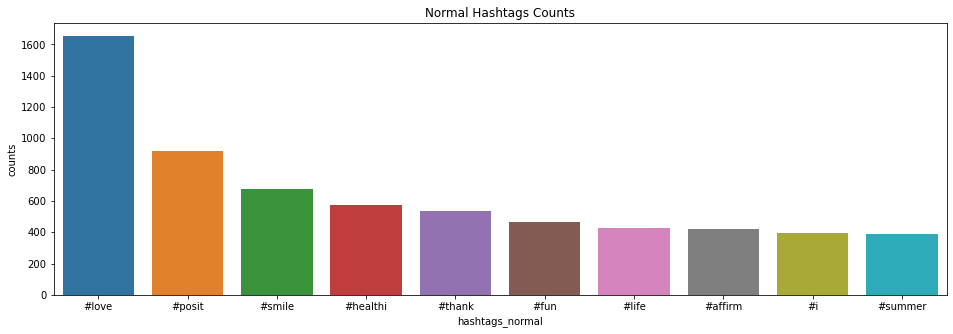

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x = df_normal['hashtags_normal'][:10], y = df_normal['counts'][:10], ci = None)
plt.title("Normal Hashtags Counts")
plt.show()

### Hashtags in Negative tweets sentiment

In [27]:
ht_freq = nltk.FreqDist(HT_negative)
ht_freq

FreqDist({'#trump': 136, '#polit': 95, '#allahsoil': 92, '#liber': 81, '#libtard': 77, '#sjw': 75, '#retweet': 63, '#black': 46, '#miami': 46, '#hate': 37, ...})

In [28]:
dict_negative = {'hashtag_negative': list(ht_freq.keys()),
                 'counts': list(ht_freq.values())}
df_negative = pd.DataFrame(dict_negative)

In [29]:
df_negative = df_negative.nlargest(columns="counts", n = 10)
df_negative

hashtag_negative  counts
22           #trump     136
31           #polit      95
64       #allahsoil      92
30           #liber      81
28         #libtard      77
29             #sjw      75
61         #retweet      63
60           #black      46
63           #miami      46
33            #hate      37

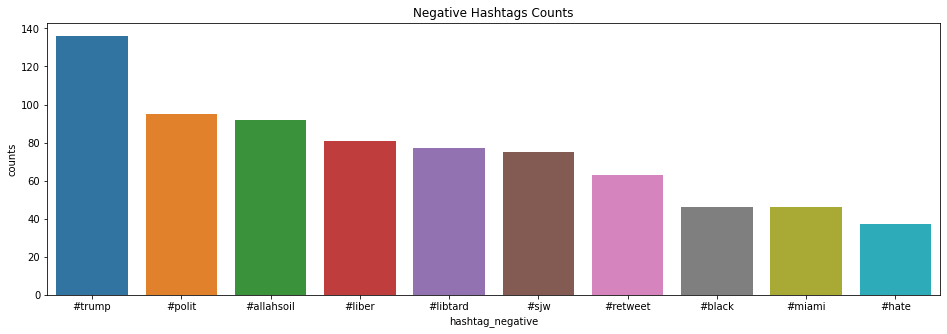

In [30]:
plt.figure(figsize=(16,5))
sns.barplot(x= "hashtag_negative", y = "counts", data= df_negative)
plt.title('Negative Hashtags Counts')
plt.show()

## TF-IDF Features

In [31]:
# Extracting Features from Cleaned Tweets using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tiv = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 2500)
X = tiv.fit_transform(data['tidy_tweet']).toarray()

In [32]:
Y = data.iloc[:,0].values  #sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [33]:
Y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Logistic regression model

In [35]:
# training the logistic regression model on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [36]:
# predicting the test result using probability values
prediction = classifier.predict_proba(X_test)
Y_pred = [ 1 if i > 0.3 else 0 for i in prediction[:,1] ]  #if prediction is greater than 0.3 then 1 else 0
#print(np.stack((Y_test, Y_pred), axis = 1))

In [37]:
# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('f1 score :', f1_score(Y_test, Y_pred))

[[8847  107]
 [ 293  342]]
accuracy : 0.9582855355094378
f1 score : 0.6309963099630996


## Random forest classification model

In [38]:
# training the random forest classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30, criterion= "entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [39]:
# predicting the test result
Y_pred = classifier.predict(X_test)
#print(np.stack((Y_test, Y_pred), axis = 1))

In [40]:
# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('f1 score :', f1_score(Y_test, Y_pred))

[[8891   63]
 [ 308  327]]
accuracy : 0.9613098341850036
f1 score : 0.6380487804878049


In [81]:
# predicting the test result using probability values
prediction = classifier.predict_proba(X_test)
Y_pred = [ 1 if i > 0.3 else 0 for i in prediction[:,1] ]  #if prediction is greater than 0.3 then 1 else 0
#print(np.stack((Y_test, Y_pred), axis = 1))

In [82]:
# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('f1 score :', f1_score(Y_test, Y_pred))

[[8747  207]
 [ 213  422]]
accuracy : 0.9561998122849098
f1 score : 0.6677215189873418


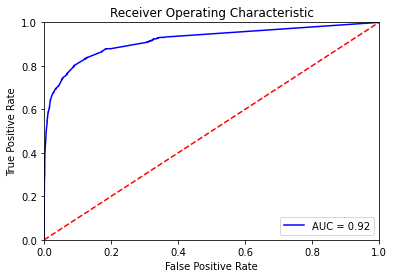

In [84]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = prediction[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()